# Log data  from Hubway

2 Oct 2015

In [145]:
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (8,6)

import contextlib
import urllib
from lxml import etree
import datetime
import pandas as pd
import time
import os

In [2]:
def getupdate():
    u = 'http://www.thehubway.com/data/stations/bikeStations.xml'
    # tweak of urlopen from hubway_repeatingquery, see http://stackoverflow.com/a/1522709
    with contextlib.closing(urllib.urlopen(u)) as x:
        data = etree.parse(x)
    stations = data.findall('station')
    everything = [[elt.text for elt in station.getchildren()] for station in stations]
    df = pd.DataFrame(everything, columns = [elt.tag for elt in data.find('station')]).convert_objects(convert_numeric=True)
    df.set_index('name', inplace=True)
    return df

In [38]:
# Make DataFrame of number of bikes available
# columns of station names, rows of timestamps
# based on http://stackoverflow.com/a/17496530
def logdatabyrow(interval, numpts):
    i = 0
    rowslist = []
    tstamplist = []
    while i < numpts:
        df = getupdate()
        rowdict = {k:v for k, v in zip(df.index, df['nbBikes'])}
        rowslist.append(rowdict)
        tstamplist.append(time.time())
        i = i+1
        time.sleep(interval)
    dflog = pd.DataFrame(rowslist, index = tstamplist)
    return dflog

In [41]:
df2 = logdatabyrow(60, 2)
df2

,359 Broadway - Broadway at Fayette Street,Agganis Arena - 925 Comm Ave.,Alewife Station at Russell Field,Allston Green District - Commonwealth Ave & Griggs St,Ames St at Main St,Andrew Station - Dorchester Ave at Humboldt Pl,Aquarium Station - 200 Atlantic Ave.,B.U. Central - 725 Comm. Ave.,BIDMC - Brookline at Burlington St,Back Bay / South End Station,...,Union Square - Brighton Ave. at Cambridge St.,Union Square - Somerville,Upham's Corner - Ramsey St at Dudley St,Washington Square at Washington St. / Beacon St.,Washington St. at Lenox St.,Washington St. at Rutland St.,Washington St. at Waltham St.,West Broadway at Dorchester St,Wilson Square,Yawkey Way at Boylston St.
1.443791e+09,4,17,13,2,17,0,11,9,6,0,...,10,8,6,8,5,0,1,2,1,3
1.443791e+09,4,17,13,2,17,0,12,9,6,0,...,10,8,6,8,5,0,1,2,1,3


In [99]:
# alt: cols of timestamps, rows of station names, then transpose
# use datetime.today() rather than time.time() to get nice
# pandas DateTimeIndex
def logdata(quantity, interval, numpts):
    df = getupdate()
    dflog = pd.DataFrame(df[quantity])
    dflog.columns = [datetime.datetime.today()]
    i = 1
    while i < numpts:
        time.sleep(interval)
        df = getupdate()
        dflog[datetime.datetime.today()] = df[quantity]
        i = i+1
    return dflog.transpose()

In [93]:
minilog = logdata('nbBikes', 60, 3)

In [94]:
minilog

name,Colleges of the Fenway,Tremont St. at Berkeley St.,Northeastern U / North Parking Lot,Cambridge St. at Joy St.,Fan Pier,Union Square - Brighton Ave. at Cambridge St.,Agganis Arena - 925 Comm Ave.,B.U. Central - 725 Comm. Ave.,Longwood Ave / Binney St,Ruggles Station / Columbus Ave.,...,Dana Park,Danehy Park,Kendall Street,Alewife Station at Russell Field,EF - North Point Park,Rindge Avenue - O'Neill Library,Harvard University Transportation Services - 175 North Harvard St,State Street at Channel Center,John F Fitzgerald - Surface Road at India Street,Ink Block
2015-10-02 10:40:56.817,2,5,2,1,7,10,16,10,10,10,...,3,7,12,16,7,9,11,3,12,4
2015-10-02 10:41:56.914,2,5,2,1,7,10,16,10,8,10,...,3,7,12,16,7,9,11,3,12,4
2015-10-02 10:42:56.999,2,5,2,1,7,10,16,10,8,10,...,3,7,13,16,7,9,11,3,12,4


In [100]:
# let's let it run for an hour at 1 Hz.
bikelog = logdata('nbBikes', 60, 60)

One problem with current `logdata` function is it doesn't run in the background -- it would be nice to have it asynchronous somehow. Or, easier, it might be better if it could accept a list of quantities to track as an argument and then spit out a list of DataFrames as output.

In [102]:
bikelog.head()

name,Colleges of the Fenway,Tremont St. at Berkeley St.,Northeastern U / North Parking Lot,Cambridge St. at Joy St.,Fan Pier,Union Square - Brighton Ave. at Cambridge St.,Agganis Arena - 925 Comm Ave.,B.U. Central - 725 Comm. Ave.,Longwood Ave / Binney St,Ruggles Station / Columbus Ave.,...,Dana Park,Danehy Park,Kendall Street,Alewife Station at Russell Field,EF - North Point Park,Rindge Avenue - O'Neill Library,Harvard University Transportation Services - 175 North Harvard St,State Street at Channel Center,John F Fitzgerald - Surface Road at India Street,Ink Block
2015-10-02 10:46:40.589,2,5,3,1,7,10,16,10,8,10,...,3,7,13,16,7,10,11,3,12,4
2015-10-02 10:47:40.689,2,5,3,1,8,10,16,10,8,10,...,3,8,13,16,7,10,11,3,12,4
2015-10-02 10:48:40.789,2,5,3,1,8,10,16,10,8,10,...,3,8,13,16,7,10,11,3,12,4
2015-10-02 10:49:40.891,2,5,3,1,8,10,16,11,8,10,...,3,8,13,16,7,10,11,3,12,4
2015-10-02 10:50:41.005,2,5,3,0,8,10,16,11,8,10,...,2,8,13,16,7,10,11,3,12,4


We have a dataset! Can plot a bunch of things.

All of the stations (a mess):

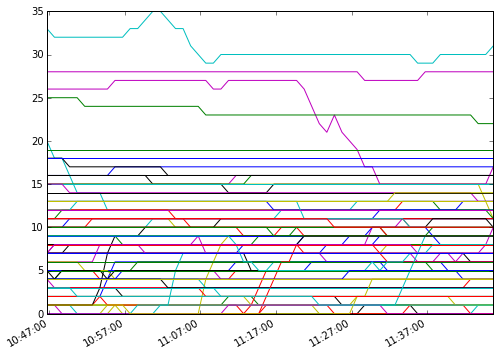

In [119]:
bikelog.plot(legend=False)

Stations that lost at least 6 bikes during the interval

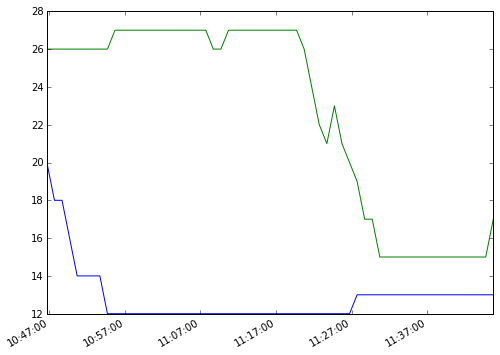

In [118]:
bikelog.loc[:, bikelog.ix[0] > bikelog.ix[-1] + 5].plot(legend=False)

Stations that gained at least 6 bikes

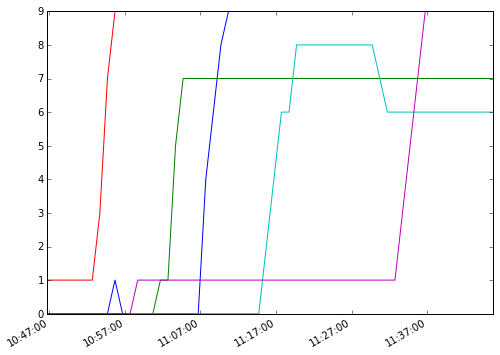

In [121]:
bikelog.loc[:, bikelog.ix[0] < bikelog.ix[-1] - 5].plot(legend=False)

Stations with lots of bikes to begin with

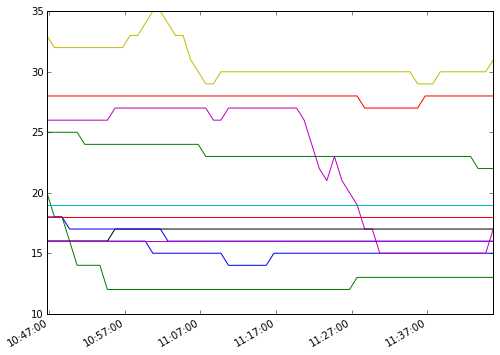

In [122]:
bikelog.loc[:, bikelog.ix[0] >15].plot(legend=False)

Total number of available bikes in the system

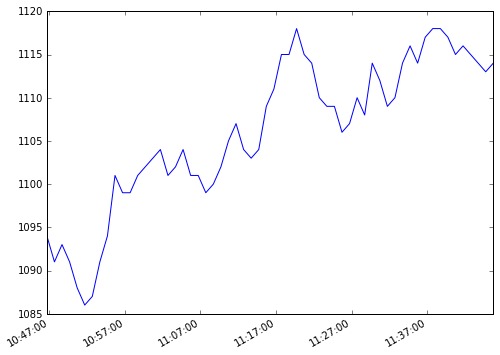

In [125]:
bikelog.sum(axis=1).plot()

Stations that had 0 available bicycles at some point.

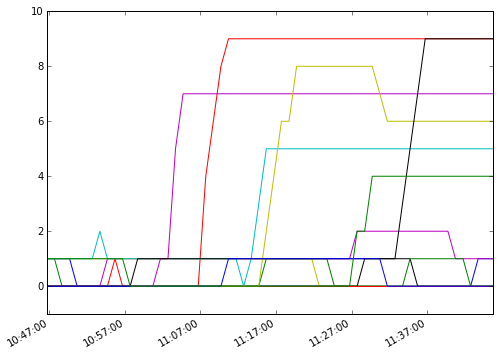

In [143]:
bikelog.loc[:,(bikelog==0).any()].plot(legend=False, ylim = [-1,10])

## Export logdata to CSV

In [151]:
bikelog.to_csv('bikelog_100215.csv')

In [152]:
os.path.getsize('bikelog_100215.csv')/1024 #KB

25L